<a href="https://colab.research.google.com/github/niveditac-98/kdd-group-5/blob/main/Group5_Project_Initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Analysis of the impact of COVID-19 on the Stock Market across different sectors and post-pandemic prediction of the same.

**Group Members:**

Ishani Naik (801223537)

Nivedita Chinnakannu (801200447)

Meghana Palaparthi (801203546)

Sayali Ambulkar (801200407)

1. From https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset, we downloaded the covid_19_data.csv file.
2. From https://www.kaggle.com/paultimothymooney/stock-market-data, from sp500 --> csv, we downloaded five datasets that were included in the S&P 500 Health Care Index (reference: https://www.barchart.com/stocks/indices/sp-sector/health-care)
3. Using DataRobot Paxata, we performed the following steps:
*   Imported all the downloaded datasets.
*   In covid_19_data.csv, we removed unnecessary rows - the rows with any country other than the US was removed.
*   Removed 4 unnecessary columns.
*   Aggregated the values in the rows by merging rows with the same date.

4. This data is now ready to be merged with the Stock Market datasets.
5. We join this version of the covid_19_data dataset with one of the Stock Market datasets (A.csv, which is the data for Agilent Technologies).
6. We remove the blank rows post-joining.
7. We remove the unnecessary columns.
8. Now, we have a dataset containing the data for confirmed cases, deaths, recovered cases due to COVID-19, mapped with dates, for which we have the stock value information for Agilent Technologies, which is one of the companies from the S&P 500 Health Care Sector.
9. We have exported this dataset from DataRobot and imported it below.



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import gridspec
import os
%matplotlib inline

In [ ]:
import pandas as pd
stock_df = pd.read_csv('/content/COVID_Stock_Market.csv')

In [ ]:
stock_df.dtypes

ObservationDate     object
Country/Region      object
Confirmed            int64
Deaths               int64
Recovered            int64
Date                object
Low                float64
Open               float64
High               float64
Close              float64
Adjusted Close     float64
dtype: object

In [ ]:
#Null Values by %
stock_df.isnull().sum()/ len(stock_df) * 100

ObservationDate    0.0
Country/Region     0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
Date               0.0
Low                0.0
Open               0.0
High               0.0
Close              0.0
Adjusted Close     0.0
dtype: float64

In [ ]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df = stock_df.loc[stock_df.Date > '28-01-2020'].copy()
print(stock_df)

      ObservationDate Country/Region  ...       Close  Adjusted Close
0          01/29/2020             US  ...   87.239998       86.185760
1          01/30/2020             US  ...   84.379997       83.360321
2          02/03/2020             US  ...   82.150002       81.157280
3          02/04/2020             US  ...   83.519997       82.510719
4          02/06/2020             US  ...   84.820000       83.795013
...               ...            ...  ...         ...             ...
19903      05/28/2021             US  ...  138.130005      137.777130
19904      05/28/2021             US  ...  138.130005      137.777130
19905      05/28/2021             US  ...  138.130005      137.777130
19906      05/28/2021             US  ...  138.130005      137.777130
19907      05/28/2021             US  ...  138.130005      137.777130

[19727 rows x 11 columns]


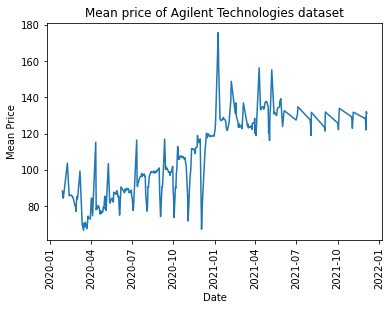

In [ ]:
#Graph showing Mean price of Agilent Technologies with respect to date
mean_df = stock_df.groupby(['Date']).mean()
plt.title('Mean price of Agilent Technologies dataset')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(mean_df.index,mean_df['High'])


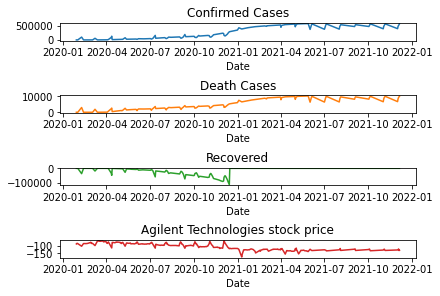

In [ ]:

fig, axs = plt.subplots(nrows= 4,constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
axs[0].plot(mean_df.index, mean_df['Confirmed'])
axs[0].set_title('Confirmed Cases')

axs[1].plot(mean_df.index, mean_df['Deaths'], 'tab:orange')
axs[1].set_title('Death Cases')
axs[2].plot(mean_df.index, -mean_df['Recovered'], 'tab:green')
axs[2].set_title('Recovered')
axs[3].plot(mean_df.index, -mean_df['High'], 'tab:red')
axs[3].set_title('Agilent Technologies stock price')

for ax in axs.flat:
    ax.set(xlabel='Date')



             Deaths      High  Recovered
Deaths     1.000000  0.341227  -0.042406
High       0.341227  1.000000  -0.019961
Recovered -0.042406 -0.019961   1.000000


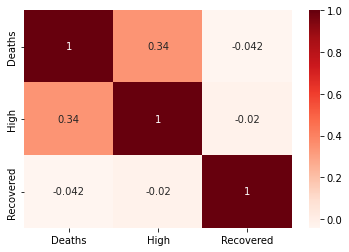

In [ ]:
stock_df[['Deaths','High','Recovered']].corr()
print(stock_df[['Deaths','High','Recovered']].corr())
#plot the correlation matrix of 'Deaths','Recovered','High' in stock_df dataframe.
sb.heatmap(stock_df[['Deaths','High','Recovered']].corr(), annot=True, cmap = 'Reds')
plt.show()

*   We have used the data from one company from the S&P 500 Health Care Sector. We are planning to include data from the companies that make up various sector indices in the future.

*  In the analysis, we will then add graphs to show sector-wise comparison of the impact of COVID-19.